In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random


In [17]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [18]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,1.463868,-1.836887,-0.377189,0.376115,0.052306,0
1,2.087467,-3.242256,-3.714770,-2.517286,1.655189,0
2,-0.134309,0.110001,-1.081316,-1.012694,1.960373,0
3,-0.848082,-0.072867,-1.189106,1.662239,0.421542,1
4,-0.305583,1.384008,-1.631051,-0.288450,-1.007028,1


In [19]:
# function for row sampling
def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [20]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [21]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [22]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\HP\AppData\Local\Temp\ipykernel_22048\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [23]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\HP\AppData\Local\Temp\ipykernel_22048\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [24]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\HP\AppData\Local\Temp\ipykernel_22048\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [25]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col2', 'col1', 'target'], dtype='object')
Index(['col5', 'col1', 'target'], dtype='object')
Index(['col2', 'col4', 'target'], dtype='object')


In [26]:
df3

,col2,col4,target
22,-1.822764,0.150315,1
38,0.288560,-0.823803,0
24,-1.151944,-0.870748,1
81,-0.818515,-2.702535,0
11,-1.506022,2.877863,1
1,-3.242256,-2.517286,0
95,-0.847717,0.964597,1
35,-1.610679,0.751338,1
54,-0.241214,-0.976482,0
7,-0.415015,0.390920,0


In [27]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [28]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [29]:

from sklearn.tree import plot_tree

[Text(0.3333333333333333, 0.875, 'x[1] <= -0.572\ngini = 0.48\nsamples = 50\nvalue = [20, 30]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 28\nvalue = [0, 28]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[0] <= 0.937\ngini = 0.165\nsamples = 22\nvalue = [20, 2]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.6666666666666666, 0.375, 'x[1] <= 0.427\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

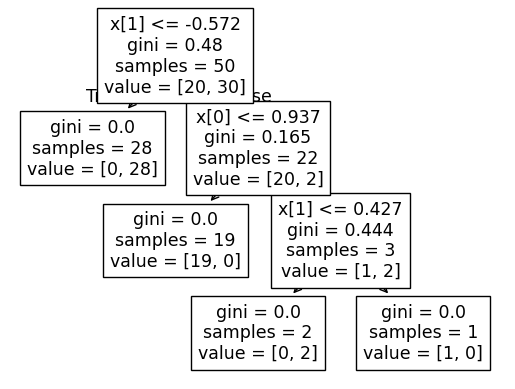

In [30]:
plot_tree(clf1)

[Text(0.6666666666666666, 0.9, 'x[1] <= 0.144\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.5, 0.7, 'x[0] <= 1.319\ngini = 0.133\nsamples = 28\nvalue = [2, 26]'),
 Text(0.5833333333333333, 0.8, 'True  '),
 Text(0.3333333333333333, 0.5, 'x[0] <= 0.231\ngini = 0.071\nsamples = 27\nvalue = [1, 26]'),
 Text(0.16666666666666666, 0.3, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(0.5, 0.3, 'x[0] <= 0.772\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6666666666666666, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.7, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.75, 0.8, '  False')]

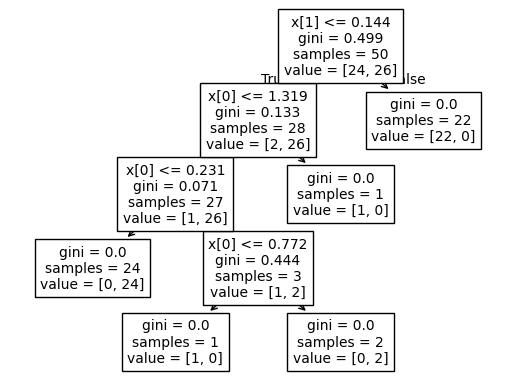

In [31]:
plot_tree(clf2)

[Text(0.6363636363636364, 0.9285714285714286, 'x[1] <= 0.423\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.45454545454545453, 0.7857142857142857, 'x[0] <= 0.519\ngini = 0.366\nsamples = 29\nvalue = [22, 7]'),
 Text(0.5454545454545454, 0.8571428571428572, 'True  '),
 Text(0.36363636363636365, 0.6428571428571429, 'x[0] <= -0.985\ngini = 0.302\nsamples = 27\nvalue = [22, 5]'),
 Text(0.2727272727272727, 0.5, 'x[0] <= -1.155\ngini = 0.459\nsamples = 14\nvalue = [9, 5]'),
 Text(0.18181818181818182, 0.35714285714285715, 'x[1] <= 0.062\ngini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(0.09090909090909091, 0.21428571428571427, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.2727272727272727, 0.21428571428571427, 'x[1] <= 0.191\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.18181818181818182, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.36363636363636365, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3636363636363636

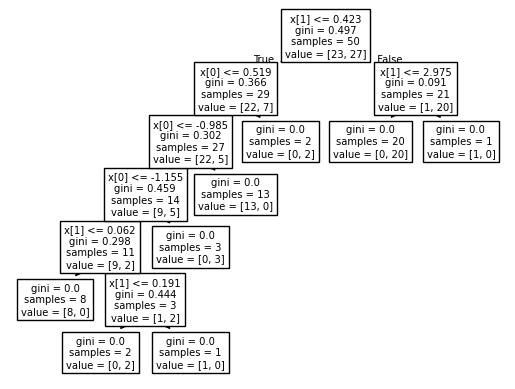

In [32]:

plot_tree(clf3)

In [33]:

clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\HP\ML-Practical-Concepts\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [34]:

clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\HP\ML-Practical-Concepts\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [35]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\HP\ML-Practical-Concepts\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [36]:

df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
71,-1.287341,-3.431378,0.342973,2.622045,1.913410,1
69,3.238591,-1.224802,-2.394702,-1.775273,2.490438,0
92,-1.847485,-0.364756,-4.483205,1.125870,-2.883647,1
37,-0.095448,-2.167579,-1.942531,-1.739966,1.229699,0
16,1.332628,-0.673122,-1.424628,-2.476051,0.947338,0
98,0.931491,-2.234509,-1.955257,-0.703535,0.989736,0
7,1.154022,-0.415015,-0.251804,0.390920,0.804040,0
2,-0.134309,0.110001,-1.081316,-1.012694,1.960373,0
58,-1.607406,-0.343011,-0.998208,-2.329251,1.665320,0
97,1.576692,-0.143233,0.256379,-0.531103,0.529970,0
